# <font color="teal"> THREE GENERATIONS SEEKING ROMANCE

<div style="text-align: center;">
  <img src="https://i.etsystatic.com/42764666/r/il/e3cf7e/5091486360/il_570xN.5091486360_hyzz.jpg" height="200" width="300">
</div>

A DATA SCIENCE APPROACH TO PROFILING ONLINE DATERS ACCORDING TO AGE & GENERATION
1. **Can your dating profile predict your age?** Regression Deep Learning
2. **Can your dating profile predict the generation you belong to?** (Millennial, Gen X-er, or Boomers) Classification - Deep Learning

Using a dataset of almost 60,000 anonymized entries from the dating platform OKCupid, You will explore the above questions using supervised machine learning techniques. You will examine different aspects or features of user profiles and see which ones you will integrate into your models to achieve the most satisfactory scores. You will use regression techniques to tackle the first question and classification models to address the second.
By exploring the “last_online” feature’s min and max, the OKCupid dataset could be inferred to be dated around 2011 or 2012. At the time, a “Millennial” would be aged from 18 to 32, a “Gen X-er” 33 to 47, and “Boomers” from 48 to 70 years old.

## <font color="teal"> Column Explanations 
1. **age** The age of the person. This is a numerical value representing how old they are.

2. **body_type** Describes the person's body type. Categories might include "a little extra," "thin," "athletic," etc.

3. **diet** The person's dietary preferences. Examples include "strictly anything," "vegetarian," "mostly other," and so on.

4. **drinks** Describes the person's drinking habits. For example: "socially," "often," "never," etc.

5. **drugs** Describes the person's drug usage. Possible values include "never," "sometimes," or possibly NaN if the information is missing.

6. **education** The person's educational status. Examples include "working on college/university," "graduated from college/university," or "working on masters program."

7. **essay0 to essay9** These columns contain personal essays or responses written by the person. They may include text responses to questions or prompts on the platform.

8. **ethnicity** The person's ethnic background. Example values include "asian, white," "black," etc.

9. **height** The person's height in centimeters.

10. **income** The person's annual income. This is a numerical value, where NaN might indicate missing or unspecified information.

11. **job** The person's occupation. For example: "transportation," "student," "hospitality / travel," "artist," etc.

12. **last_online** The date and time the person was last active on the platform. The format appears to be `YYYY-MM-DD-HH-MM`.

13. **location** The geographic location of the person. This column contains the city and state (e.g., "San Francisco, California").

14. **offspring** Information about whether the person has or wants children. This column may contain values like "doesn't have kids, but might want them" or "doesn't want kids."

15. **orientation**  The person's sexual orientation, such as "straight," "gay," "bisexual," etc.

16. **pets** Information about whether the person has pets. Example values: "likes dogs and likes cats," "has cats," etc.

17. **religion** The person's religious beliefs or practices. For example: "agnosticism," "Christianity," etc.

18. **sex** The gender of the person. For example: "m" (male), "f" (female), etc.

19. **sign** The person's astrological zodiac sign. For example: "gemini," "pisces," "aquarius," etc.

20. **smokes** Information about whether the person smokes. Example values: "yes," "no," or "sometimes."

21. **speaks** The languages the person speaks. This could include one or more languages such as "english," "spanish," "french," etc.

22. **status** The person's relationship status. Examples include "single," "in a relationship," "married," etc.


## <font color="teal"> Requirements

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', None)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import plotly.express as px

## <font color="teal"> Import Data

In [8]:
df=pd.read_csv("profiles.csv")

## <font color="teal"> EDA (Exploratory Data Analysis)

In [10]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [11]:
df.shape

(60552, 31)

In [12]:
df.notnull().sum()

age            9514
body_type      8666
diet           5761
drinks         9012
drugs          7215
education      8459
essay0         8667
essay1         8347
essay2         8049
essay3         7690
essay4         7879
essay5         7814
essay6         7352
essay7         7553
essay8         6361
essay9         7554
ethnicity      8565
height         9514
income         9514
job            8183
last_online    9514
location       9514
offspring      3886
orientation    9514
pets           6352
religion       6261
sex            9514
sign           7776
smokes         8596
speaks         9508
status         9514
dtype: int64

In [13]:
df.tail() 

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.corr(numeric_only=True)

,age,height,income
age,1.000000,-0.022078,0.011424
height,-0.022078,1.000000,0.073105
income,0.011424,0.073105,1.000000


In [15]:
df["body_type"].unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

In [16]:
df["diet"].unique()

array(['strictly anything', 'mostly other', 'anything', 'vegetarian', nan,
       'mostly anything', 'mostly vegetarian', 'strictly vegan',
       'strictly vegetarian', 'mostly vegan', 'strictly other',
       'mostly halal', 'other', 'vegan', 'mostly kosher',
       'strictly halal', 'halal', 'strictly kosher', 'kosher'],
      dtype=object)

In [17]:
df["drinks"].unique()

array(['socially', 'often', 'not at all', 'rarely', nan, 'very often',
       'desperately'], dtype=object)

In [18]:
df["drugs"].unique()

array(['never', 'sometimes', nan, 'often'], dtype=object)

In [19]:
df["education"].unique()

array(['working on college/university', 'working on space camp',
       'graduated from masters program',
       'graduated from college/university', 'working on two-year college',
       nan, 'graduated from high school', 'working on masters program',
       'graduated from space camp', 'college/university',
       'dropped out of space camp', 'graduated from ph.d program',
       'graduated from law school', 'working on ph.d program',
       'two-year college', 'graduated from two-year college',
       'working on med school', 'dropped out of college/university',
       'space camp', 'graduated from med school',
       'dropped out of high school', 'working on high school',
       'masters program', 'dropped out of ph.d program',
       'dropped out of two-year college', 'dropped out of med school',
       'high school', 'working on law school', 'law school',
       'dropped out of masters program', 'ph.d program',
       'dropped out of law school'], dtype=object)

In [20]:
df['orientation'].value_counts()

orientation
straight    8191
gay          897
bisexual     426
Name: count, dtype: int64

## <font color="teal"> Feature Engineering

### <font color="teal"> Handling NaN Values

In [23]:
#we have lots of duplicate values so we need to remove them
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
9510,31.0,athletic,mostly anything,socially,sometimes,NaN,i work in the beauty salon as a hairstylist fo...,making your hair look beautiful.,i'm a hairstylist and love making hair look be...,i am different.,NaN,money<br />\ncell phone<br />\ncomputer<br />\...,how to be rich.,working and making your hair look beautiful an...,NaN,you like my profile and hair.,white,72.0,-1.0,hospitality / travel,2012-04-05-21-46,"san francisco, california",NaN,gay,NaN,atheism,m,scorpio but it doesn&rsquo;t matter,sometimes,english,single
9511,34.0,average,NaN,socially,NaN,dropped out of college/university,"33 year old, hiv +,versatile gwm, bearish type...",i've just recently moved to beautiful san fran...,"buying ""crap"" at random places and then sellin...",i usually go unnoticed.......,my favorite books - i don't read as much as i ...,-my record player<br />\n-my internet connecti...,nothing and everything all at once,probably working. then having drinks in the ca...,"i smoke marijuana, but nothing harder.","you're interested, duh!?!?",white,71.0,-1.0,hospitality / travel,2012-04-28-12-42,"san francisco, california",doesn&rsquo;t want kids,gay,likes dogs and has cats,atheism and laughing about it,m,leo and it&rsquo;s fun to think about,when drinking,english (fluently),single
9512,29.0,athletic,anything,rarely,never,two-year college,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,70.0,-1.0,NaN,2012-03-01-15-17,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",gay,likes dogs and has cats,NaN,m,aries,no,"english (fluently), french (okay), swedish (po...",single
9513,49.0,overweight,NaN,rarely,never,graduated from college/university,NaN,NaN,NaN,NaN,"books: biographies, history, harry potter, mys...","the internet, art supplies, family, garden, my...",NaN,NaN,NaN,NaN,white,64.0,-1.0,rather not say,2012-06-14-15-14,"castro valley, california",NaN,straight,likes dogs and likes cats,NaN,f,pisces and it&rsquo;s fun to think about,no,english,single
9514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# we saw that last row of has also NaN  values, we can remove it 
df = df.drop(index=9514).reset_index(drop=True)

In [25]:
df.shape

(9514, 31)

In [26]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
essay0          847
essay1         1167
essay2         1465
essay3         1824
essay4         1635
essay5         1700
essay6         2162
essay7         1961
essay8         3153
essay9         1960
ethnicity       949
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes          918
speaks            6
status            0
dtype: int64

### <font color="teal"> Define 'generation' Column

In [28]:
def classify_generation(age):
    if 18 <= age <= 32:
        return 'Millennial'
    elif 33 <= age <= 47:
        return 'Gen X'
    elif 48 <= age <= 70:
        return 'Boomer'
    else:
        return 'Other'

df['generation'] = df['age'].apply(classify_generation)

In [29]:
df['generation'].value_counts()

generation
Millennial    6047
Gen X         2721
Boomer         745
Other            1
Name: count, dtype: int64

In [30]:
df[df['generation']=='Other'] # Detecting outlier value

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,generation
2512,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,-1.0,NaN,2012-06-27-22-16,"daly city, california",NaN,straight,NaN,NaN,f,NaN,NaN,english,single,Other


In [31]:
df.drop(index=2512, inplace=True)
df.reset_index(drop=True, inplace=True) 

### <font color="teal"> Modified 'last_online' Column

In [33]:
df['last_online'] = pd.to_datetime(df['last_online'], format='%Y-%m-%d-%H-%M')

In [34]:
df['last_online'] = df['last_online'].dt.year.astype(str) + '-' + df['last_online'].dt.month.astype(str)

### <font color="teal"> Modified 'body_type' Column

In [36]:
df['body_type'] = df['body_type'].fillna('unknown')

In [37]:
df["body_type"].isnull().sum()

0

In [38]:
def simplify_body_type(bt):
    if bt in ['skinny', 'thin']:
        return 'slim'
    elif bt in ['curvy', 'full figured', 'a little extra']:
        return 'curvy'
    elif bt in ['athletic', 'fit', 'jacked']:
        return 'fit'
    elif bt in ['average', 'rather not say', 'unknown']:
        return 'average'
    elif bt in ['overweight', 'used up']:
        return 'overweight'
    else:
        return bt

df['body_type'] = df['body_type'].apply(simplify_body_type)

In [39]:
df['body_type'].nunique()

5

### <font color="teal"> Define 'has_kid', 'want_kid' Column

In [41]:
df['has_kid'] = df['offspring'].str.contains(r'has|have', na=False).astype(int)
df['want_kid'] = df['offspring'].str.contains(r'want|wants', na=False).astype(int)

In [42]:
df["offspring"].head(10)

0    doesn&rsquo;t have kids, but might want them
1    doesn&rsquo;t have kids, but might want them
2                                             NaN
3                         doesn&rsquo;t want kids
4                                             NaN
5    doesn&rsquo;t have kids, but might want them
6                                             NaN
7         doesn&rsquo;t have kids, but wants them
8                         doesn&rsquo;t have kids
9                                             NaN
Name: offspring, dtype: object

In [43]:
df['has_kid'].head(10)

0    1
1    1
2    0
3    0
4    0
5    1
6    0
7    1
8    1
9    0
Name: has_kid, dtype: int32

In [44]:
df['want_kid'].head(10)

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: want_kid, dtype: int32

### <font color="teal"> Handle Missing Values on 'diet' Column

In [46]:
body_type_mode = df.groupby('body_type')['diet'].agg(lambda x: x.mode()[0])
df['diet'] = df['diet'].fillna(df['body_type'].map(body_type_mode))

In [47]:
diet_mapping = {
    'strictly anything': 'anything',
    'mostly anything': 'anything',
    'anything': 'anything',
    'strictly vegetarian': 'vegetarian',
    'mostly vegetarian': 'vegetarian',
    'vegetarian': 'vegetarian',
    'strictly vegan': 'vegan',
    'mostly vegan': 'vegan',
    'vegan': 'vegan',
    'strictly halal': 'halal',
    'mostly halal': 'halal',
    'halal': 'halal',
    'strictly kosher': 'kosher',
    'mostly kosher': 'kosher',
    'kosher': 'kosher',
    'strictly other': 'other',
    'mostly other': 'other',
    'other': 'other'
}

df['diet'] = df['diet'].map(diet_mapping)

In [48]:
df['diet'].unique()

array(['anything', 'other', 'vegetarian', 'vegan', 'halal', 'kosher'],
      dtype=object)

### <font color="teal"> Handle Missing Values on 'drinks' Column

In [50]:
df['drinks'] = df['drinks'].fillna(df.groupby('generation')['drinks'].transform(lambda x: x.mode()[0] ))

In [51]:
df["drinks"].value_counts()

drinks
socially       7180
rarely          911
often           809
not at all      509
very often       54
desperately      50
Name: count, dtype: int64

### <font color="teal"> Handle Missing Values on 'drugs' Column

In [53]:
df['drugs'] = df['drugs'].fillna(df.groupby('generation')['drugs'].transform(lambda x: x.mode()[0] ))

In [54]:
df["drugs"].value_counts()

drugs
never        8270
sometimes    1181
often          62
Name: count, dtype: int64

### <font color="teal"> Modified and Handle Missing Values on 'education' Column 

In [56]:
df['education'] = df['education'].replace({
    'working on college/university': 'Working on Education',
    'working on space camp': 'Working on Education',
    'graduated from masters program': 'Graduated',
    'graduated from college/university': 'Graduated',
    'working on two-year college': 'Working on Education',
    'graduated from high school': 'Graduated',
    'working on masters program': 'Working on Education',
    'graduated from space camp': 'Graduated',
    'college/university': 'Graduated',
    'dropped out of space camp': 'Dropped out of Education',
    'graduated from ph.d program': 'Graduated',
    'graduated from law school': 'Graduated',
    'working on ph.d program': 'Working on Education',
    'two-year college': 'Graduated',
    'graduated from two-year college': 'Graduated',
    'working on med school': 'Working on Education',
    'dropped out of college/university': 'Dropped out of Education',
    'space camp': 'Graduated',
    'graduated from med school': 'Graduated',
    'dropped out of high school': 'Dropped out of Education',
    'working on high school': 'Working on Education',
    'masters program': 'Graduated',
    'dropped out of ph.d program': 'Dropped out of Education',
    'dropped out of two-year college': 'Dropped out of Education',
    'dropped out of med school': 'Dropped out of Education',
    'high school': 'Graduated',
    'working on law school': 'Working on Education',
    'law school': 'Graduated',
    'dropped out of masters program': 'Dropped out of Education',
    'ph.d program': 'Graduated',
    'dropped out of law school': 'Dropped out of Education'
})

In [57]:
df['education'] = df['education'].fillna(df.groupby('generation')['education'].transform(lambda x: x.mode()[0] ))

In [58]:
df['education'].value_counts()

education
Graduated                   7463
Working on Education        1727
Dropped out of Education     323
Name: count, dtype: int64

### <font color="teal"> Modified and Handle Missing Values on 'job' Column 

In [60]:
df['job'] = df['job'].replace({ 
    'transportation': 'Other',
    'hospitality / travel': 'Other',
    'student': 'Other',
    'artistic / musical / writer': 'Artistic',
    'computer / hardware / software': 'Technology',
    'banking / financial / real estate': 'Finance',
    'entertainment / media': 'Media',
    'sales / marketing / biz dev': 'Sales',
    'other': 'Other',
    'medicine / health': 'Health',
    'science / tech / engineering': 'Science',
    'executive / management': 'Management',
    'education / academia': 'Education',
    'clerical / administrative': 'Administration',
    'construction / craftsmanship': 'Construction',
    'rather not say': 'Other',
    'political / government': 'Government',
    'law / legal services': 'Law',
    'unemployed': 'Other',
    'military': 'Other',
    'retired': 'Other',
    np.nan:'No Mentioned'})


In [61]:
df['job'].value_counts()

job
Other             2432
No Mentioned      1330
Science            780
Artistic           715
Technology         709
Sales              709
Health             613
Education          538
Management         378
Media              356
Finance            353
Law                200
Construction       178
Administration     117
Government         105
Name: count, dtype: int64

### <font color="teal"> Modified and Handle Missing Values on 'sign' Column 

In [63]:
 df['sign'] = df['sign'].replace(   {'gemini':'gemini',
     'cancer':'cancer',
     'pisces but it doesn&rsquo;t matter':'pisces',
     'pisces':'pisces',
      'aquarius':'aquarius', 
     'taurus':'taurus',
     'virgo':'virgo',
     'sagittarius':'sagittarius',
     'gemini but it doesn&rsquo;t matter':'gemini',
     'cancer but it doesn&rsquo;t matter':'cancer',
     'leo but it doesn&rsquo;t matter':'leo', 
      np.nan:'No Mentioned',
      'aquarius but it doesn&rsquo;t matter':'aquarius',
       'aries and it&rsquo;s fun to think about':'aries',
       'libra but it doesn&rsquo;t matter':'libra',
       'pisces and it&rsquo;s fun to think about':'pisces',
         'libra':'libra',
       'taurus but it doesn&rsquo;t matter':'taurus',
       'sagittarius but it doesn&rsquo;t matter':'sagittarius',
       'scorpio and it matters a lot':'scorpio',
       'gemini and it&rsquo;s fun to think about':'gemini',
       'leo and it&rsquo;s fun to think about':'leo',
       'cancer and it&rsquo;s fun to think about':'cancer',
       'libra and it&rsquo;s fun to think about':'libra',
       'aquarius and it&rsquo;s fun to think about':'aquarius',
       'virgo but it doesn&rsquo;t matter':'virgo',
       'scorpio and it&rsquo;s fun to think about':'scorpio',
       'capricorn but it doesn&rsquo;t matter':'capricorn', 
         'scorpio':'scorpio',
       'capricorn and it&rsquo;s fun to think about':'capricorn', 
       'leo':'leo',
       'aries but it doesn&rsquo;t matter':'aries', 
       'aries':'aries',
       'scorpio but it doesn&rsquo;t matter':'scorpio',
       'sagittarius and it&rsquo;s fun to think about':'sagittarius',
       'libra and it matters a lot':'libra',
       'taurus and it&rsquo;s fun to think about':'taurus',
       'leo and it matters a lot':'leo',
       'virgo and it&rsquo;s fun to think about':'virgo',
       'cancer and it matters a lot':'cancer', 
     'capricorn':'capricorn',
       'pisces and it matters a lot' :'pisces', 
        'aries and it matters a lot':'aries',
       'capricorn and it matters a lot':'capricorn',
        'aquarius and it matters a lot':'aquarius',
       'sagittarius and it matters a lot':'sagittarius',
        'gemini and it matters a lot':'gemini',
       'taurus and it matters a lot':'taurus', 
        'virgo and it matters a lot':'virgo'})

### <font color="teal"> Handle Missing Values on 'smokes' Columns 

In [65]:
df['smokes'].fillna('No Mentioned',inplace=True);

### <font color="teal"> Define 'has_pets' Column 

In [67]:
df['has_pets'] = df['pets'].str.contains('has', na=False).astype(int)

In [68]:
df['has_pets'].value_counts()

has_pets
0    7230
1    2283
Name: count, dtype: int64

### <font color="teal"> Modified 'income' Column 

In [70]:
df["income"] = df["income"].replace({
    -1.0e+00: 0,
    8.0e+04: 80000,
    2.0e+04: 20000, 
    4.0e+04: 40000, 
    3.0e+04: 30000,
    5.0e+04: 50000,
    6.0e+04: 60000, 
    1.0e+06: 1000000, 
    1.5e+05: 150000,
    1.0e+05: 100000, 
    5.0e+05: 500000, 
    7.0e+04: 70000, 
    2.5e+05: 250000})

In [71]:
df.isnull().sum()

age               0
body_type         0
diet              0
drinks            0
drugs             0
education         0
essay0          846
essay1         1166
essay2         1464
essay3         1823
essay4         1634
essay5         1699
essay6         2161
essay7         1960
essay8         3152
essay9         1959
ethnicity       948
height            0
income            0
job               0
last_online       0
location          0
offspring      5627
orientation       0
pets           3161
religion       3252
sex               0
sign              0
smokes            0
speaks            6
status            0
generation        0
has_kid           0
want_kid          0
has_pets          0
dtype: int64

## <font color="teal"> Modelling -Regression
We are able to answer **<font color="teal">Can our dating profile predict your age?**

In [73]:
x=df[['body_type', 'diet', 'drinks', 'drugs', 'education','income', 
      'job','sex', 'sign', 'smokes','status', 'generation','has_pets','orientation','has_kid', 'want_kid','last_online']]
y=df[['age']]

In [74]:
x=pd.get_dummies(x,drop_first=True)

In [75]:
def algo_test(x,y,plot=False):
    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    kn=KNeighborsRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
    rf=RandomForestClassifier()

    algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb,rf]
    algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Bossting','KNeighborRegressor','DecisionTreeRegressor','XGBReggressor','Random Forest Classifier']

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

    r_squared=[]
    rmse=[]
    mae=[]

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared.append(r2_score(y_test,p))
        rmse.append(mean_squared_error(y_test,p)**0.5)
        mae.append(mean_absolute_error(y_test,p))

    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    r_table=result.sort_values('R_Squared',ascending=False)
    if plot:
        best_model = algos[r_squared.index(max(r_squared))]
        y_pred = best_model.predict(x_test)
        
        plt.figure(figsize=(10,6))
        plt.plot(y_test.reset_index(drop=True),label='Acutal',color='green',linestyle='--')
        plt.plot(pd.Series(y_pred),label='Predicted',color='red',linestyle='--')
        plt.xlabel('Predicted Sales')
        plt.ylabel('Actual Sales')
        plt.title('Actual vs Predicted Sales for Best Model')
        plt.legend()
        plt.show()
    return r_table

In [76]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Bossting,0.835965,3.605842,2.989767
Ridge,0.831213,3.657702,3.023842
Linear,0.831192,3.657925,3.024430
XGBReggressor,0.822859,3.747123,3.057511
Random Forest Classifier,0.699469,4.880710,3.757225
DecisionTreeRegressor,0.680433,5.032913,3.933287
Extra Tree,0.669897,5.115205,4.029413
Lasso,0.596962,5.652117,4.042815
KNeighborRegressor,0.536311,6.062498,4.136206
ElasticNet,0.331773,7.277800,5.154753


We can infer that the dating profile features are relatively effective in predicting age, with the **Gradient Boosting model** yielding the highest performance. The **R-squared value of 0.836** for Gradient Boosting indicates that about **83.6% **of the variation in age can be explained by the model, suggesting a strong predictive ability. Models like **Ridge and Linear regression** also perform well, with similar **R-squared values around 0.83**. 

## <font color="teal"> Modelling -Regression
We are able to answer **<font color="teal">Can our dating profile predict the generation you belong to?**

In [79]:
x=df[['body_type', 'diet', 'drinks', 'drugs', 'education','income', 'job','sex', 'sign', 'smokes','status','has_pets','orientation','has_kid', 'want_kid','last_online']]
y=df[['generation']]

In [80]:
x=pd.get_dummies(x,drop_first=True)

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

def classification_test(x, y, confusion_mtr=False, classification_rpt=False):
    g = GaussianNB()
    b = BernoulliNB()
    l = LogisticRegression()
    d = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    h = GradientBoostingClassifier()
    k = KNeighborsClassifier()
    
    algos = [g, b, l, d, rf, h, k]
    algo_names = ['Gaussian NB', 'Bernoulli NB', 'Logistic Regression', 'Decision Tree Classifier', 
                  'Random Forest Classifier', 'Gradient Boosting Classifier', 'KNeighbors Classifier']

    accuracy = []
    confusion = []
    classification = []
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    result = pd.DataFrame(columns=['Accuracy Score', 'Confusion Matrix', 'Classification Report'], index=algo_names)

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test, p))
        confusion.append(confusion_matrix(y_test, p))
        classification.append(classification_report(y_test, p))

    result['Accuracy Score'] = accuracy
    result['Confusion Matrix'] = confusion
    result['Classification Report'] = classification

    r_table = result.sort_values('Accuracy Score', ascending=False)
    
    if confusion_mtr:
        for index, row in r_table.iterrows():
            confusion_mat = np.array(row['Confusion Matrix'])
            plt.figure(figsize=(5, 3))  
            sns.heatmap(confusion_mat, annot=True, cmap='coolwarm', fmt='d', 
                        xticklabels=['Boomers', 'Gen X-er', 'Millennial'], 
                        yticklabels=['Boomers', 'Gen X-er', 'Millennial'])
            plt.title(f"Confusion Matrix for {index}")
            plt.ylabel('Actual')
            plt.xlabel('Predicted')
            plt.show()

    if classification_rpt:
        for index, row in r_table.iterrows():
            print(f"Classification Report of {index}:")
            print(row['Classification Report'])
        
    return r_table[['Accuracy Score']]

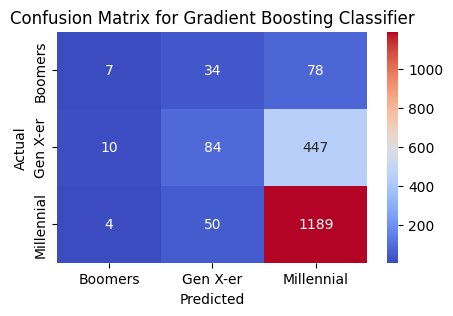

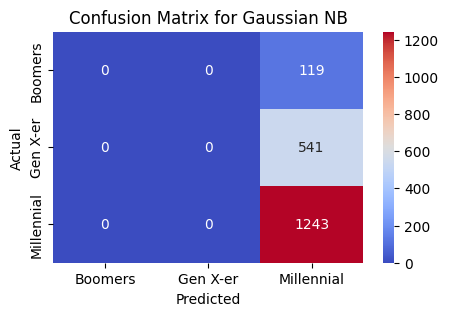

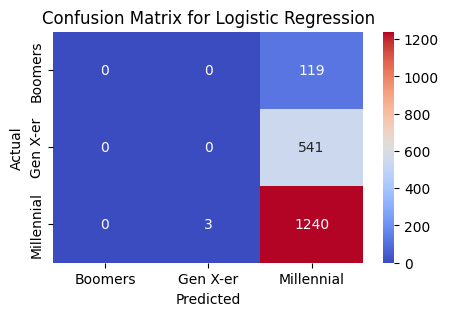

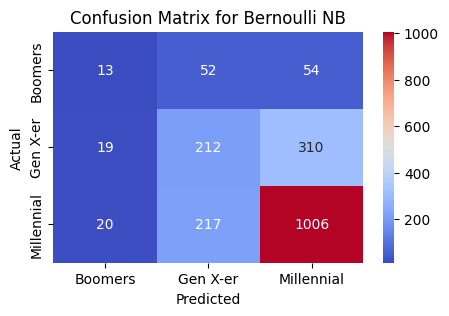

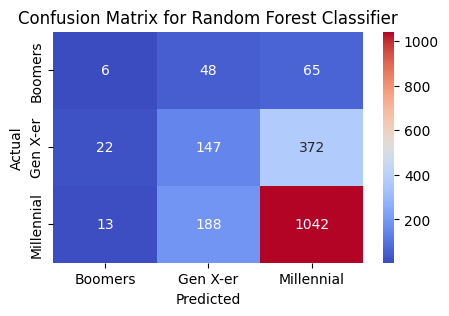

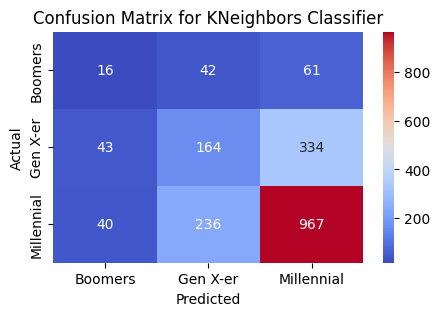

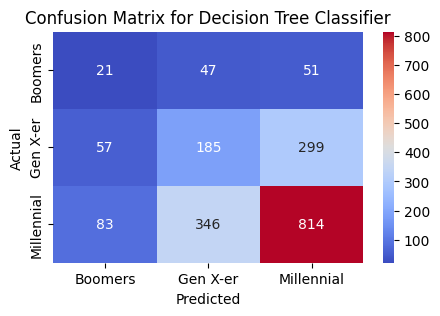

Classification Report of Gradient Boosting Classifier:
              precision    recall  f1-score   support

      Boomer       0.33      0.06      0.10       119
       Gen X       0.50      0.16      0.24       541
  Millennial       0.69      0.96      0.80      1243

    accuracy                           0.67      1903
   macro avg       0.51      0.39      0.38      1903
weighted avg       0.62      0.67      0.60      1903

Classification Report of Gaussian NB:
              precision    recall  f1-score   support

      Boomer       0.00      0.00      0.00       119
       Gen X       0.00      0.00      0.00       541
  Millennial       0.65      1.00      0.79      1243

    accuracy                           0.65      1903
   macro avg       0.22      0.33      0.26      1903
weighted avg       0.43      0.65      0.52      1903

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

      Boomer       0.00      0.00      0.00 

,Accuracy Score
Gradient Boosting Classifier,0.672622
Gaussian NB,0.653179
Logistic Regression,0.651603
Bernoulli NB,0.646873
Random Forest Classifier,0.627956
KNeighbors Classifier,0.602733
Decision Tree Classifier,0.535996


In [82]:
classification_test(x,y,confusion_mtr=True,classification_rpt=True)

The table above shows the accuracy scores of various classifiers in predicting a person's generation based on their dating profile information. The **Gradient Boosting Classifier** achieved the highest accuracy score of **0.673**, suggesting it is the best model for this task. Other classifiers like **Gaussian Naive Bayes** and **Logistic Regression** performed slightly worse with scores of **0.653** and **0.652** respectively. The **Decision Tree Classifier** showed the lowest performance with an accuracy score of **0.545**. These results imply that while generation prediction based on dating profiles is possible, there is still room for improvement in model performance.